In [2]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision

In [3]:
epochs = 10
batch_size = 128
lr = 0.008


# DataLoader
train_set = torchvision.datasets.MNIST(
    root='mnist',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [24]:
class autoencoder(nn.Module):
  def __init__(self):
    super(autoencoder,self).__init__()
    self.encoder=nn.Sequential(
        nn.Linear(784,128),#28*28
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,16),
        nn.ReLU(),
        nn.Linear(16,2),
        nn.ReLU()
    )
    self.decoder=nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,784),#28*28
        nn.Sigmoid()
    )
  def forward(self,inputs):
    enc=self.encoder(inputs)
    dec=self.decoder(enc)
    return enc,dec

In [25]:
import numpy as np
# cuda
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
AE=autoencoder().to(device)

def train():
  loss_function = nn.MSELoss()
  optimizer = torch.optim.Adam(AE.parameters(), lr=lr)

  for epoch in range(30): 
      running_loss = 0.0
      num = 0
      for i, data in enumerate(train_loader):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)  
          inputs = inputs.view(-1,784).to(device)
          enc,dec= AE(inputs)
          optimizer.zero_grad()
          
          loss = loss_function(dec, inputs).to(device)
          loss.backward()   # 梯度計算
          optimizer.step()  # 參數更新

          running_loss += loss.item()
          num += labels.size()[0]

      print('epoch: %d\t loss: %.6f' % (epoch + 1, running_loss / num))
    
if __name__ == '__main__':
    train()
    print('Training Finished')

epoch: 1	 loss: 0.000475
epoch: 2	 loss: 0.000424
epoch: 3	 loss: 0.000406
epoch: 4	 loss: 0.000400
epoch: 5	 loss: 0.000364
epoch: 6	 loss: 0.000342
epoch: 7	 loss: 0.000333
epoch: 8	 loss: 0.000327
epoch: 9	 loss: 0.000324
epoch: 10	 loss: 0.000316
epoch: 11	 loss: 0.000316
epoch: 12	 loss: 0.000311
epoch: 13	 loss: 0.000309
epoch: 14	 loss: 0.000306
epoch: 15	 loss: 0.000305
epoch: 16	 loss: 0.000303
epoch: 17	 loss: 0.000303
epoch: 18	 loss: 0.000303
epoch: 19	 loss: 0.000301
epoch: 20	 loss: 0.000302
epoch: 21	 loss: 0.000300
epoch: 22	 loss: 0.000299
epoch: 23	 loss: 0.000299
epoch: 24	 loss: 0.000297
epoch: 25	 loss: 0.000296
epoch: 26	 loss: 0.000296
epoch: 27	 loss: 0.000296
epoch: 28	 loss: 0.000299
epoch: 29	 loss: 0.000299
epoch: 30	 loss: 0.000294
Training Finished


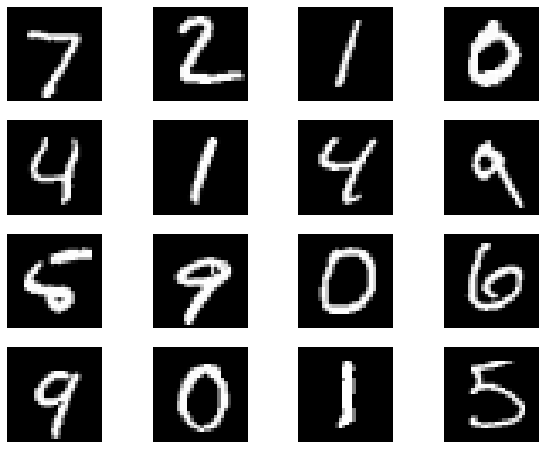

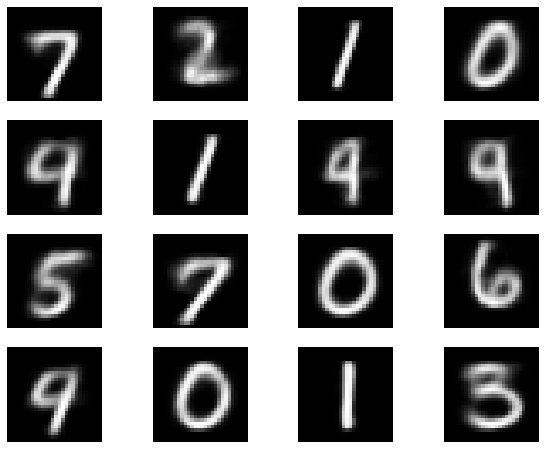

In [26]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def show_images(images):
  sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
  for index, image in enumerate(images):
      plt.subplot(sqrtn, sqrtn, index+1)
      plt.imshow(image.reshape(28, 28))
      plt.axis('off')

test_set = torchvision.datasets.MNIST(
  root='mnist',
  train=False,
  download=True,
  transform=torchvision.transforms.ToTensor(),
)
test_loader = data.DataLoader(test_set, batch_size=16, shuffle=False)


with torch.no_grad():
  for data in test_loader:
    inputs = data[0].view(-1, 28*28)
    show_images(inputs)
    plt.show()

    code, outputs = AE(inputs)
    show_images(outputs)
    plt.show()
    break;
    # exit()